# Gearbox Vibration Data EDA

In this script, I will perform an **Exploratory Data Analysis (EDA)** on the gearbox vibration dataset. The main goal is to explore the data, understand the relationships between features, and prepare the dataset for future machine learning tasks. Below are the key steps I will follow:

1. **Loading Data:** First, I will import the dataset and check its structure, which includes the number of samples and features.
2. **Basic Information:** I will check for missing values, data types, and class balance in the target variable (`condition`).
3. **Numerical Summary:** I will summarize the statistics of each feature to understand their ranges and distributions.
4. **Feature Distributions:** I will visualize the distribution of key features (`a1`, `a2`, `a3`, `a4`, `load`) across different conditions (healthy vs. broken).
5. **Class Balance Visualization:** I will check the balance of the target variable (`condition`) to see if the dataset is evenly distributed.
6. **Correlation Analysis:** I will examine correlations between features to understand their relationships and redundancy.
7. **Correlation with Target:** I will check which features correlate most with the target variable (`condition`).
8. **Feature Relationships:** I will visualize pairwise relationships between features to identify trends or patterns.
9. **Statistical Testing:** I will perform statistical tests to compare the feature distributions between healthy and broken conditions.
10. **PCA Analysis:** Finally, I will apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset and visualize the variance.

These steps will give me a detailed understanding of the dataset and prepare it for applying machine learning models.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### 1. **Loading and Exploring the Data**
   - **Why?** To import the processed gearbox vibration dataset and get an overview of its structure.
   - **What we do:** Load the dataset using `pandas` and check its shape, column names, and data types. This step helps in confirming that the data has been correctly imported and is ready for analysis.

In [4]:
#Load Data
print("Loading data...")
df = pd.read_csv('../data/processed_gearbox_data.csv')
print(f"Data loaded: {df.shape[0]} samples, {df.shape[1]} features")

Loading data...
Data loaded: 2021119 samples, 7 features


### 2. **Basic Information**
   - **Why?** To get a quick understanding of missing data, data types, and class distribution.
   - **What we do:** Use `df.info()` to check for any missing values or incorrect data types. We also print the class balance (healthy vs. broken condition) to understand the distribution of the target variable.

In [6]:
# Basic Info
print("\n=== BASIC INFO ===")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nClass balance:\n", df['condition'].value_counts(normalize=True))


=== BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021119 entries, 0 to 2021118
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   a1           float64
 1   a2           float64
 2   a3           float64
 3   a4           float64
 4   condition    int64  
 5   load         int64  
 6   source_file  object 
dtypes: float64(4), int64(2), object(1)
memory usage: 107.9+ MB
None

Missing values:
 a1             0
a2             0
a3             0
a4             0
condition      0
load           0
source_file    0
dtype: int64

Class balance:
 condition
0    0.502597
1    0.497403
Name: proportion, dtype: float64


### 5. **Class Balance Visualization**
   - **Why?** To check the balance of the target variable (`condition`), ensuring that the dataset does not have an imbalanced class distribution.
   - **What we do:** Create a pie chart to visualize the proportion of healthy and broken samples in the dataset. This is essential for ensuring that machine learning models are not biased by an imbalanced target.

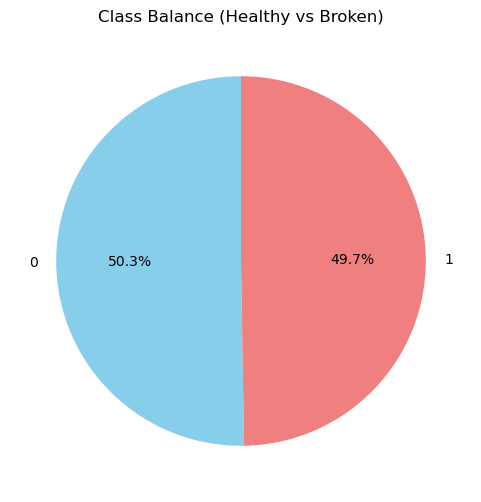

In [8]:
# Visualize Class Balance as Pie Chart
plt.figure(figsize=(6, 6))
df['condition'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Class Balance (Healthy vs Broken)')
plt.ylabel('')

plt.savefig('../results/class_balance_pie_chart.png')

plt.show() 
plt.close()

### Class Balance (Healthy vs Broken)

The pie chart above shows the distribution of samples between healthy and broken gearboxes in the dataset:

- **Healthy (Condition 0)**: 50.3% of the total samples are labeled as healthy.
- **Broken (Condition 1)**: 49.7% of the total samples are labeled as broken.

This indicates that the dataset is nearly balanced in terms of the number of healthy and broken samples, which is beneficial for training machine learning models as it reduces potential bias towards one class.

---
### 3. **Numerical Summary**
   - **Why?** To understand the central tendency, spread, and variability of the numerical features.
   - **What we do:** Use `df.describe()` to summarize statistics such as mean, standard deviation, min, and max values for each feature. This will help identify outliers or potential data quality issues.

In [11]:
# Numerical Summary
print("\n=== NUMERICAL SUMMARY ===")
print(df.describe())


=== NUMERICAL SUMMARY ===
                 a1            a2            a3            a4     condition  \
count  2.021119e+06  2.021119e+06  2.021119e+06  2.021119e+06  2.021119e+06   
mean   1.341575e-03  2.589083e-04  4.453338e-03  6.101136e-04  4.974032e-01   
std    6.157919e+00  4.408471e+00  3.963242e+00  4.466629e+00  4.999934e-01   
min   -5.872160e+01 -3.294430e+01 -2.916740e+01 -3.133450e+01  0.000000e+00   
25%   -3.265495e+00 -2.432110e+00 -2.116310e+00 -2.373490e+00  0.000000e+00   
50%   -7.987520e-02  9.292100e-02  4.860470e-02  1.161210e-01  0.000000e+00   
75%    3.135560e+00  2.582300e+00  2.196570e+00  2.483190e+00  1.000000e+00   
max    5.670660e+01  3.092830e+01  2.693890e+01  3.734990e+01  1.000000e+00   

               load  
count  2.021119e+06  
mean   4.564659e+01  
std    2.865902e+01  
min    0.000000e+00  
25%    2.000000e+01  
50%    5.000000e+01  
75%    7.000000e+01  
max    9.000000e+01  


### Numerical Summary

The dataset contains the following features: `a1`, `a2`, `a3`, `a4`, `condition`, and `load`.

- **Mean**: 
  - Features `a1`, `a2`, `a3`, and `a4` have small mean values close to zero, while `load` has a mean value of approximately 45.65.
- **Standard Deviation**: 
  - Features `a1`, `a2`, `a3`, and `a4` exhibit significant variability with standard deviations ranging from 3.96 to 6.16. `Load` shows moderate variability with a standard deviation of 28.66.
- **Range**:
  - `a1`, `a2`, `a3`, and `a4` show a wide range of values (e.g., `a1` ranges from -58.72 to 56.71), suggesting large fluctuations in these measurements.
  - `Load` ranges from 0 to 90, indicating a variety of load levels observed in the dataset.
- **Percentiles**: 
  - The 25th, 50th (median), and 75th percentiles show significant variation in the data, particularly for `a1` and `a2`, suggesting non-uniform distributions across the samples.

This summary provides an overview of the dataset's characteristics, highlighting the variability, range, and distribution of the features, which will help in further analysis and model development.

---
### 4. **Visualizing Feature Distributions**
   - **Why?** To visualize how features are distributed across different conditions (healthy and broken).
   - **What we do:** Generate boxplots for each feature (`a1`, `a2`, `a3`, `a4`, `load`) and the target variable `condition`. This will allow us to identify differences in feature distributions across healthy and broken conditions.

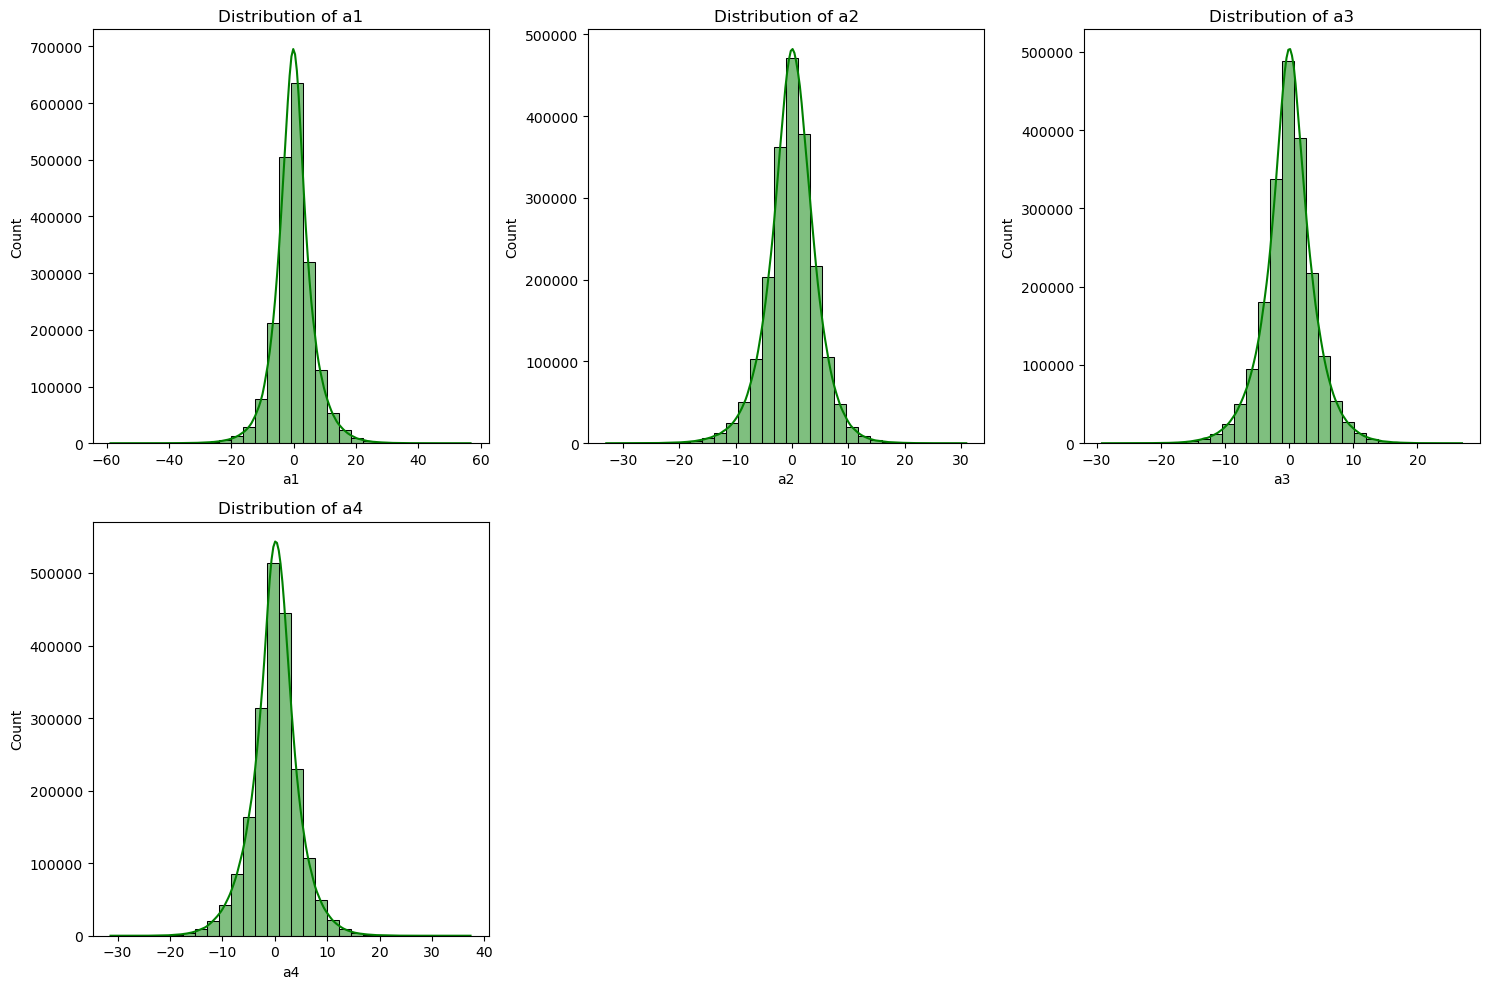

In [14]:
# 4. Feature Distribution - Histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['a1', 'a2', 'a3', 'a4']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, color='green', bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()

plt.savefig('../results/feature_distributions.png')

plt.show()
plt.close()

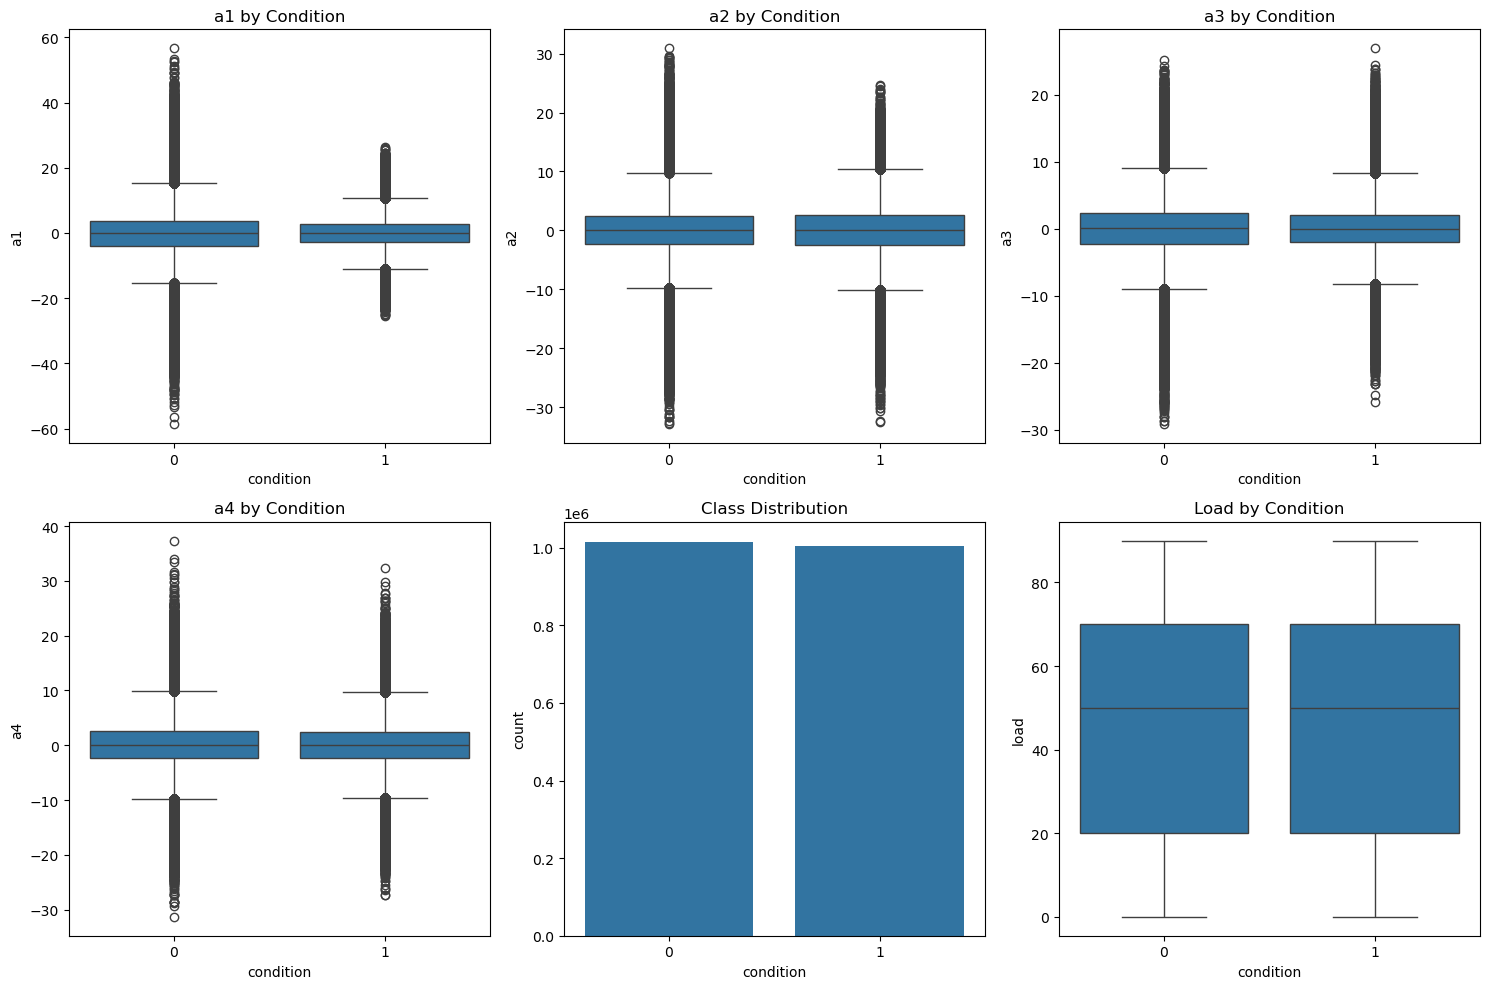

In [15]:
# 5. Boxplots for Feature vs Condition
plt.figure(figsize=(15, 10))

# Distribution Plots for features with respect to Condition
for i, feature in enumerate(['a1', 'a2', 'a3', 'a4']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='condition', y=feature, data=df)
    plt.title(f'{feature} by Condition')

plt.subplot(2, 3, 5)
sns.countplot(x='condition', data=df)
plt.title('Class Distribution')

plt.subplot(2, 3, 6)
sns.boxplot(x='condition', y='load', data=df)
plt.title('Load by Condition')

plt.tight_layout()

plt.savefig('../results/basic_distributions.png')

plt.show()
plt.close()

### 6. **Correlation Analysis**
   - **Why?** To explore the relationships between features and understand how they are interrelated.
   - **What we do:** Generate a heatmap showing the correlation matrix of features. Strong correlations can indicate redundancy in the data, suggesting potential dimensionality reduction techniques (e.g., PCA).

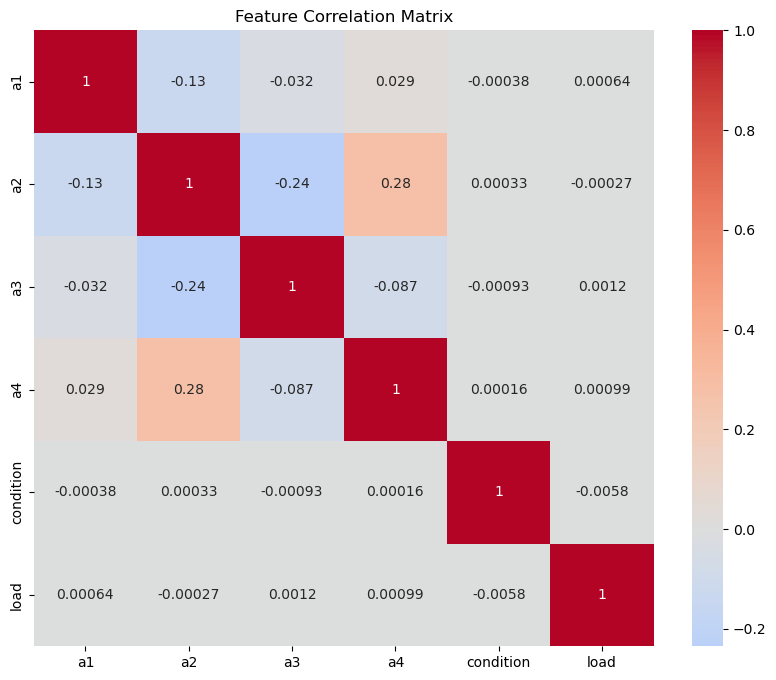

In [17]:
# Correlation Analysis
plt.figure(figsize=(10, 8))

df_numeric = df.drop(columns=['source_file']).select_dtypes(include=['number'])

corr = df_numeric.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
# Save and display the plot
plt.savefig('../results/correlation_matrix.png')
plt.show()
plt.close()


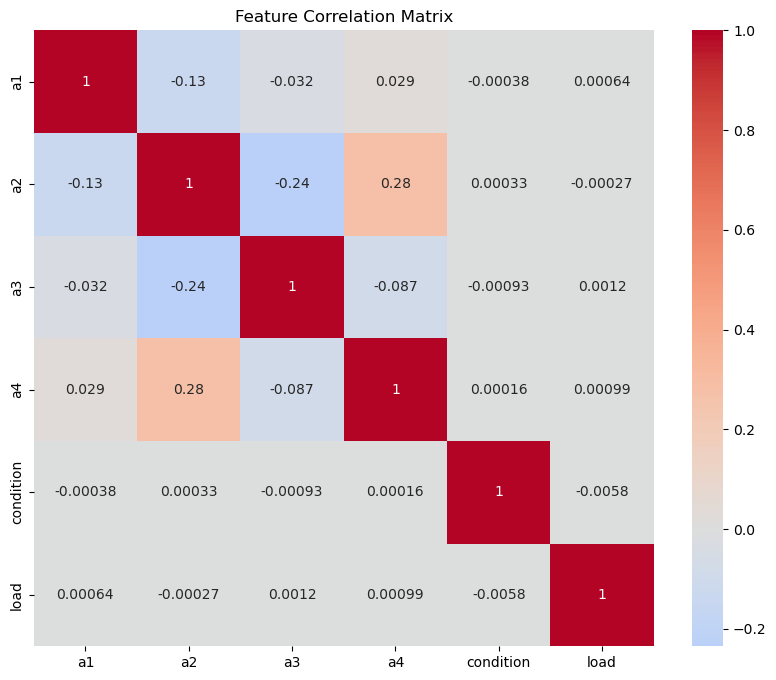

In [18]:
# Correlation Analysis
plt.figure(figsize=(10, 8))

# Drop non-numeric columns and select only numeric columns for correlation analysis
df_numeric = df.drop(columns=['source_file']).select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = df_numeric.corr()

# Create the heatmap for correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

# Save and display the plot
plt.savefig('../results/correlation_matrix.png')
plt.show()
plt.close()


### 7. **Correlation with Target (Condition)**
   - **Why?** To understand which features are most correlated with the target variable (`condition`), which is crucial for building predictive models.
   - **What we do:** Plot a heatmap of the correlation of each feature with the target variable. This allows us to identify features that are most relevant for classification.

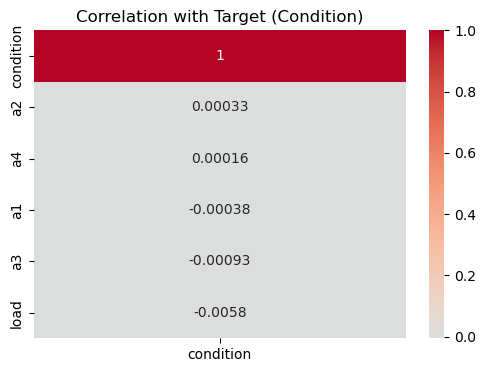

In [20]:
# Correlation with Target (Condition)
plt.figure(figsize=(6, 4))
sns.heatmap(df.drop(columns=['source_file']).corr()[['condition']].sort_values(by='condition', ascending=False), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation with Target (Condition)')
plt.savefig('../results/correlation_with_target.png')

plt.show()
plt.close()


### 8. **Feature Relationships with Pairplots**
   - **Why?** To visualize the relationships between different features and the target variable.
   - **What we do:** Create pairplots to visualize the relationships between the features (`a1`, `a2`, `a3`, `a4`) with respect to the target variable (`condition`). This helps identify any patterns or separability between the classes.

In [22]:
# Feature Relationships
# g = sns.PairGrid(df[['a1', 'a2', 'a3', 'a4', 'condition']], hue='condition')
#g.map_upper(sns.scatterplot, alpha=0.5)
#g.map_lower(sns.kdeplot)
#g.map_diag(sns.histplot, kde=True)
#g.add_legend()
#plt.savefig('../results/pairplot_relationships.png')

#plt.show()
#plt.close()

### 9. **Statistical Testing**
   - **Why?** To assess whether the differences in feature distributions between the two conditions (healthy vs. broken) are statistically significant.
   - **What we do:** Perform t-tests on each feature to compare the means of the healthy and broken groups. The results will indicate which features are most useful for distinguishing between the two classes.


In [24]:
# Statistical Testing
print("\n=== STATISTICAL TESTS ===")
features = ['a1', 'a2', 'a3', 'a4', 'load']
for feature in features:
    group0 = df[df['condition'] == 0][feature]
    group1 = df[df['condition'] == 1][feature]
    t_stat, p_val = stats.ttest_ind(group0, group1)
    print(f"\n{feature}:")
    print(f"Healthy mean: {group0.mean():.4f}")
    print(f"Broken mean: {group1.mean():.4f}")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_val:.4f}")



=== STATISTICAL TESTS ===

a1:
Healthy mean: 0.0037
Broken mean: -0.0010
t-statistic: 0.5464
p-value: 0.5848

a2:
Healthy mean: -0.0012
Broken mean: 0.0017
t-statistic: -0.4725
p-value: 0.6366

a3:
Healthy mean: 0.0081
Broken mean: 0.0007
t-statistic: 1.3285
p-value: 0.1840

a4:
Healthy mean: -0.0001
Broken mean: 0.0013
t-statistic: -0.2310
p-value: 0.8173

load:
Healthy mean: 45.8115
Broken mean: 45.4800
t-statistic: 8.2226
p-value: 0.0000


In [25]:
# 10. Outlier Detection using Z-Score
print("\n=== OUTLIER DETECTION ===")
from scipy.stats import zscore

z_scores = pd.DataFrame(zscore(df[['a1', 'a2', 'a3', 'a4']]), columns=['a1', 'a2', 'a3', 'a4'])
outliers = (z_scores > 3) | (z_scores < -3)
outlier_count = outliers.sum(axis=0)
print(f"Outliers detected (Z-score > 3 or < -3):")
print(outlier_count)


=== OUTLIER DETECTION ===
Outliers detected (Z-score > 3 or < -3):
a1    28101
a2    22160
a3    22842
a4    22215
dtype: int64


### 10. **PCA Analysis**
   - **Why?** To reduce the dimensionality of the dataset and visualize the variance explained by the features.
   - **What we do:** Apply Principal Component Analysis (PCA) to project the data into two principal components and visualize the distribution of healthy vs. broken conditions. PCA helps in identifying if the classes are separable in a lower-dimensional space.

In [27]:
# PCA Analysis
print("\n=== PCA ANALYSIS ===")
X = df[['a1', 'a2', 'a3', 'a4', 'load']]  # Include load as well
y = df['condition']


=== PCA ANALYSIS ===


In [28]:
# Standardizing the data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

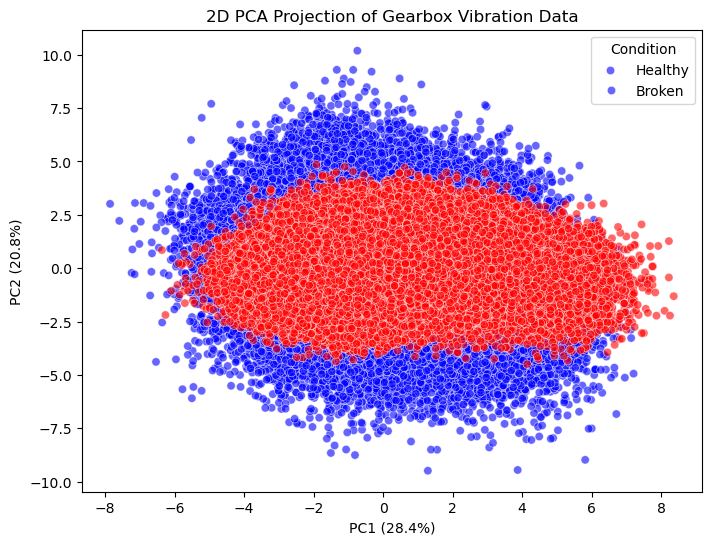

In [47]:
# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# 3. Visualize the PCA results
plt.figure(figsize=(8, 6))

# Scatter plot of the first two principal components
sns.scatterplot(x=principal_components[:, 0], 
                y=principal_components[:, 1], 
                hue=y,
                palette={0: 'blue', 1: 'red'},
                alpha=0.6)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('2D PCA Projection of Gearbox Vibration Data')

plt.legend(title='Condition', labels=['Healthy', 'Broken'])

# Save the plot as an image
plt.savefig('../results/pca_analysis.png')


plt.show()
plt.close()